In [32]:

import numpy as np
import pandas as pd

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
     


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [35]:

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.multioutput import MultiOutputRegressor   

In [36]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [37]:


df = pd.read_csv("/workspaces/mech-props/steel_strength.csv")
df.head()
     

,formula,Fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,60.50,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,60.98,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,62.16,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,61.61,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,62.43,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5


In [38]:
df = df.drop(['formula'],axis=1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fe                312 non-null    float64
 1   c                 312 non-null    float64
 2   mn                312 non-null    float64
 3   si                312 non-null    float64
 4   cr                312 non-null    float64
 5   ni                312 non-null    float64
 6   mo                312 non-null    float64
 7   v                 312 non-null    float64
 8   n                 312 non-null    float64
 9   nb                312 non-null    float64
 10  co                312 non-null    float64
 11  w                 312 non-null    float64
 12  al                312 non-null    float64
 13  ti                312 non-null    float64
 14  yield strength    312 non-null    float64
 15  tensile strength  312 non-null    float64
 16  elongation        303 non-null    float64
dt

In [40]:
df.isna().sum()

Fe                  0
c                   0
mn                  0
si                  0
cr                  0
ni                  0
mo                  0
v                   0
n                   0
nb                  0
co                  0
w                   0
al                  0
ti                  0
yield strength      0
tensile strength    0
elongation          9
dtype: int64

In [41]:

df = df.fillna(df.mean())
     

In [42]:
df.isna().sum()

Fe                  0
c                   0
mn                  0
si                  0
cr                  0
ni                  0
mo                  0
v                   0
n                   0
nb                  0
co                  0
w                   0
al                  0
ti                  0
yield strength      0
tensile strength    0
elongation          0
dtype: int64

<Axes: >

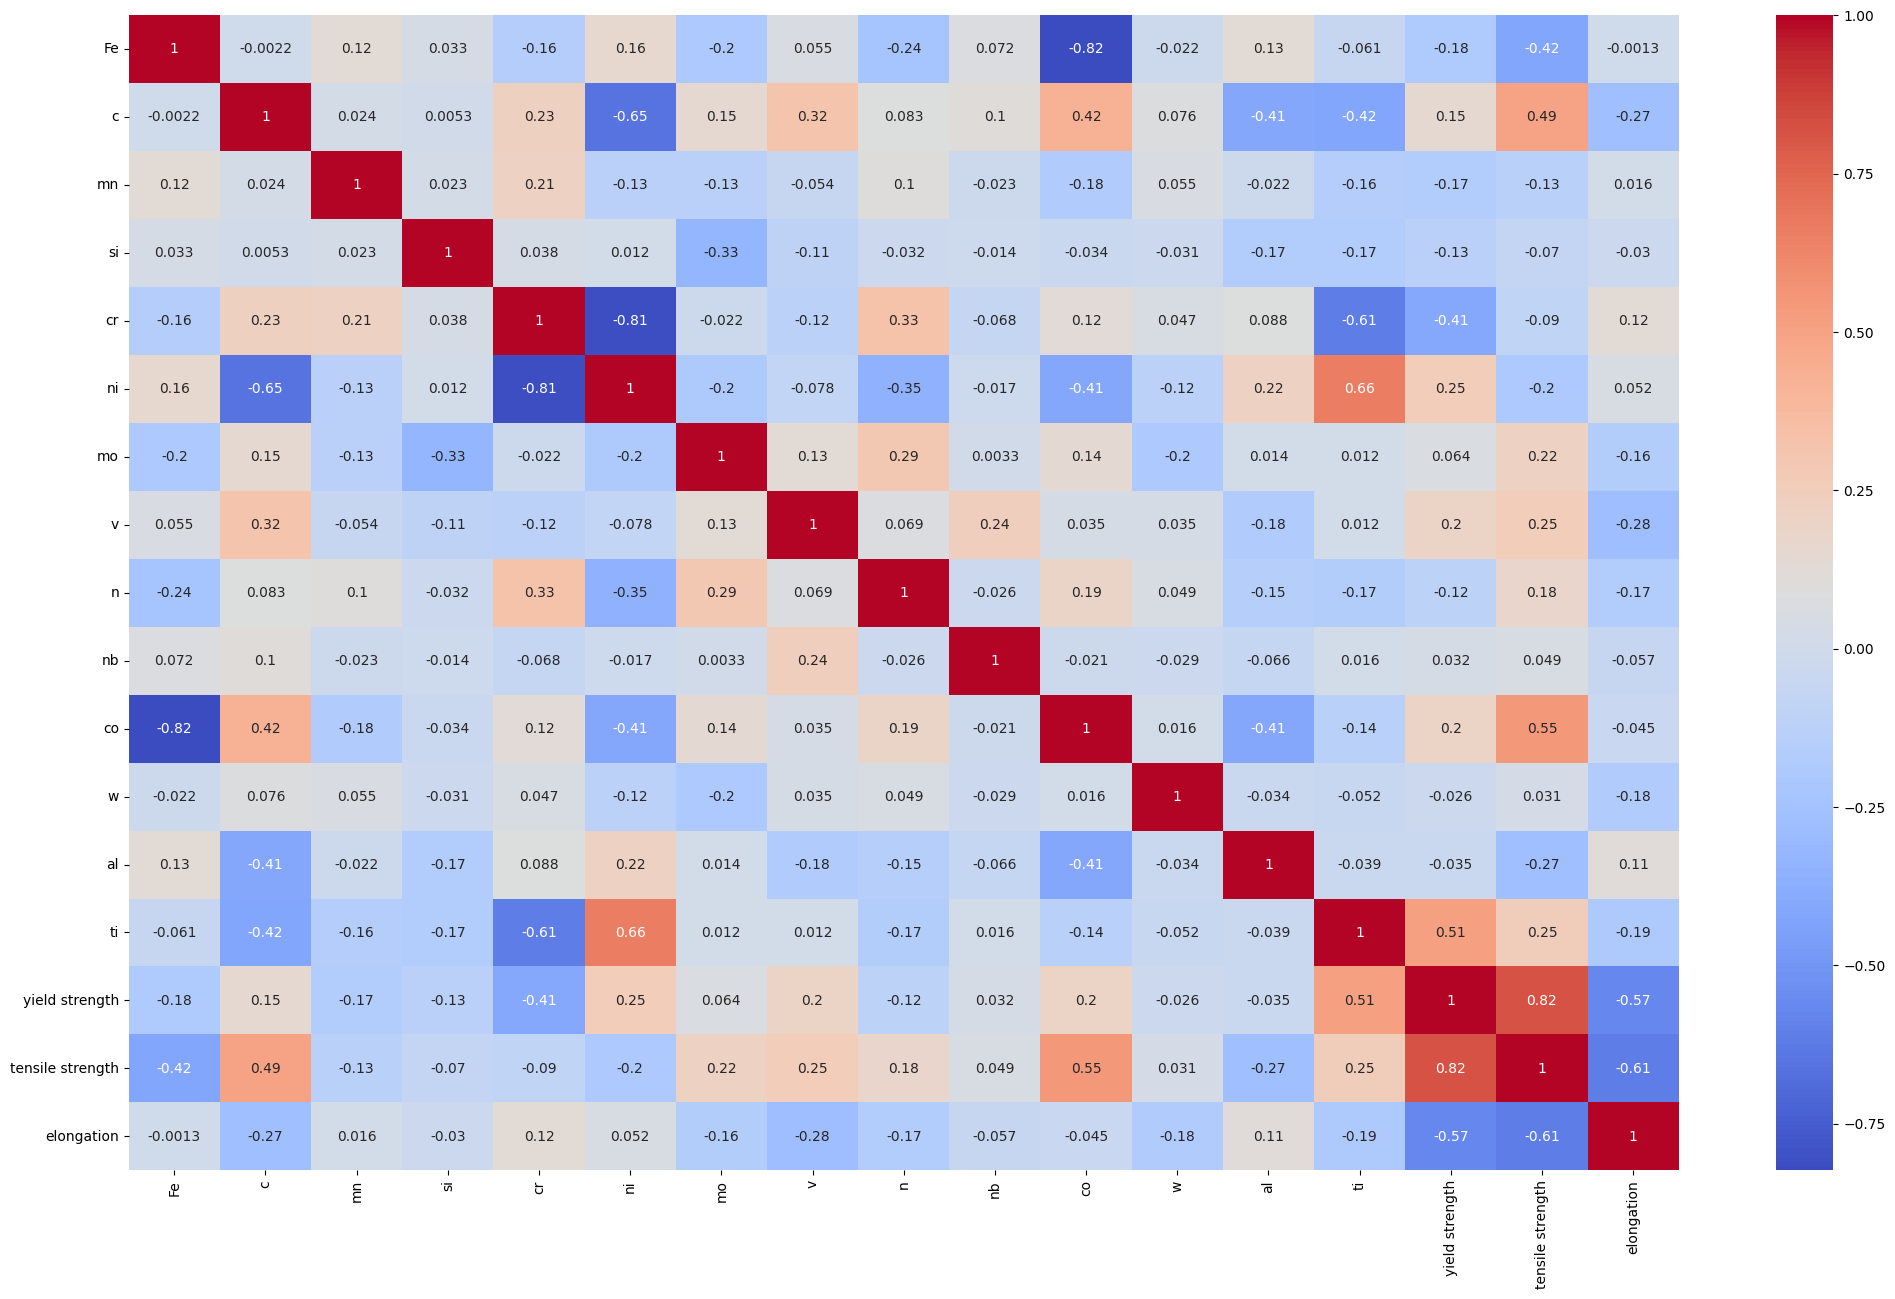

In [43]:
correlation = df.corr()
plt.subplots(figsize=(25,15))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, cmap='coolwarm')
     

In [44]:
X = df.iloc[:,0:14] #Feature Columns
y = df.iloc[:,14:]  #Target Columns

In [45]:

X.head()

,Fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,60.50,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55
1,60.98,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00
2,62.16,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57
3,61.61,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47
4,62.43,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55


In [46]:

y.head()

,yield strength,tensile strength,elongation
0,2411.5,2473.5,7.000000
1,1123.1,1929.2,8.000000
2,1736.3,1871.8,14.007261
3,2487.3,2514.9,9.000000
4,2249.6,2315.0,8.500000


In [47]:
sc = MinMaxScaler()

X_scaled = pd.DataFrame(sc.fit_transform(X),columns=X.columns);
y_scaled = pd.DataFrame(sc.fit_transform(y),columns=y.columns);
     

In [48]:

X_scaled.head()

,Fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,0.000000,0.046512,0.013378,0.008439,0.000000,0.938066,0.303627,0.002315,0.000000,0.004,0.746142,0.000000,0.078212,0.620
1,0.018634,0.418605,0.000000,0.000000,0.767867,0.000000,0.309845,0.106481,0.266667,0.004,0.968143,0.255991,0.016760,0.000
2,0.064441,0.000000,0.000000,0.000000,0.495140,0.640305,0.082902,0.002315,0.000000,0.004,0.691389,0.000000,0.212291,0.228
3,0.043090,0.023256,0.013378,0.008439,0.000000,0.842782,0.407254,0.002315,0.000000,0.004,0.746142,0.000000,0.067039,0.588
4,0.074922,0.023256,0.013378,0.008439,0.000000,0.923773,0.148187,0.002315,0.000000,0.004,0.741165,0.000000,0.067039,0.620


In [49]:
y_scaled.head()

,yield strength,tensile strength,elongation
0,0.934326,0.937782,0.151515
1,0.077905,0.586847,0.181818
2,0.485509,0.549839,0.363856
3,0.984712,0.964475,0.212121
4,0.826708,0.835590,0.196970


In [50]:
from sklearn.model_selection import train_test_split

X_new,X_test,y_new,y_test = train_test_split(X_scaled,y_scaled,test_size=0.1,random_state=1);
X_train,X_valid,y_train,y_valid = train_test_split(X_new,y_new,test_size=0.2,random_state=1)

[X_train.shape,y_train.shape],[X_valid.shape,y_valid.shape],[X_test.shape,y_test.shape]

([(224, 14), (224, 3)], [(56, 14), (56, 3)], [(32, 14), (32, 3)])

In [51]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (224, 14) (224, 3)
Validation set shape: (56, 14) (56, 3)
Test set shape: (32, 14) (32, 3)


In [52]:
y_Test = sc.inverse_transform(y_test)
actual_yield_strength = np.transpose(y_Test)[0]
actual_tensile_strength = np.transpose(y_Test)[1]
actual_pct_elongation = np.transpose(y_Test)[2]

In [53]:
actual_yield_strength

array([1680.6, 1150.6, 1860.3, 1297.5, 1287.3, 1012.8, 1139.7, 1340.8,
       1404.2, 1088.6, 1172. , 1792.2, 1768. , 1131.9, 1429.7, 1376.7,
       1026.6, 1819. , 1846.5, 1592.9, 1071.4, 1010.8, 1603.3, 1615.8,
       2331.1, 1414.5, 1308. , 1371.1, 1486.2, 1455.4, 1280.2, 1309.1])

In [54]:


def model_results(XTrain,XValid,yTrain,yValid):
  models =[('Linear', LinearRegression()),
           ('Random Forest',RandomForestRegressor()),
           ('KNN', KNeighborsRegressor(n_neighbors=10)),
           ('Support Vector',MultiOutputRegressor(SVR())),
           ('Decision Tree',MultiOutputRegressor(DecisionTreeRegressor())),
           ('GradientBoost',MultiOutputRegressor(GradientBoostingRegressor())),
          ]
  finalResults = []

  for name,model in models:
      model.fit(XTrain, yTrain)
      model_results = model.predict(XValid)
      r2score = r2_score(yValid, model_results)
      RMSE = mean_squared_error(yValid, model_results,squared = False)
      MAE = mean_absolute_error(yValid, model_results)
      finalResults.append((name, r2score, RMSE, MAE))

  finalResults.sort(key=lambda k:k[2])
  return finalResults

In [55]:
np.random.seed(42)
np_results = model_results(X_train,X_valid,y_train,y_valid)
results = pd.DataFrame(np_results,columns=['Model Name', 'R2 Score', 'RMSE', 'MAE'])
results

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate t

,Model Name,R2 Score,RMSE,MAE
0,GradientBoost,0.821409,0.079277,0.052834
1,Random Forest,0.769904,0.087501,0.059861
2,Support Vector,0.747576,0.091883,0.066530
3,Decision Tree,0.699167,0.105924,0.071512
4,KNN,0.691688,0.106212,0.071565
5,Linear,0.581041,0.122134,0.083332


In [56]:
names = []
r2score = []
rmse = []
mae = []
for model in np_results:
  names.append(model[0])
  r2score.append(model[1])
  rmse.append(model[2])
  mae.append(model[3])

Text(0.5, 1.0, 'r2score comparison')

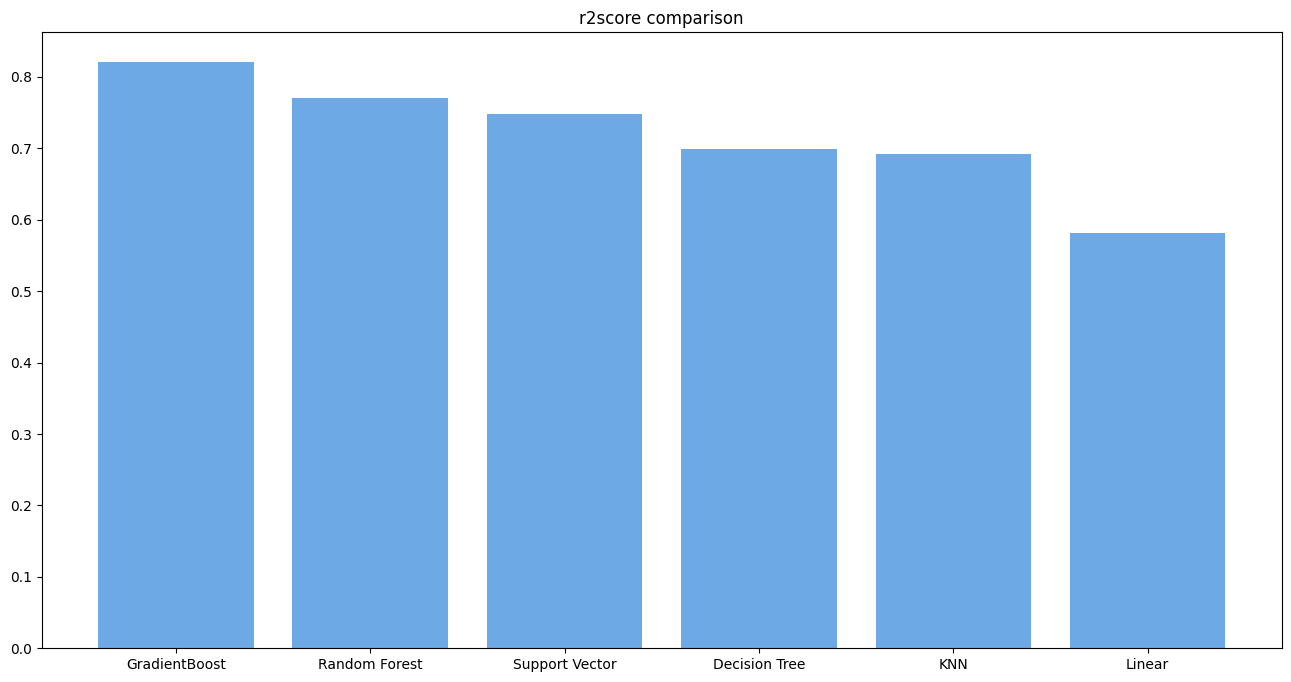

In [57]:
fig = plt.figure(figsize = (16, 8))
plt.bar(names,r2score,width=0.8,color='#6DA9E4')
plt.title('r2score comparison')

Text(0.5, 1.0, 'rmse comparison')

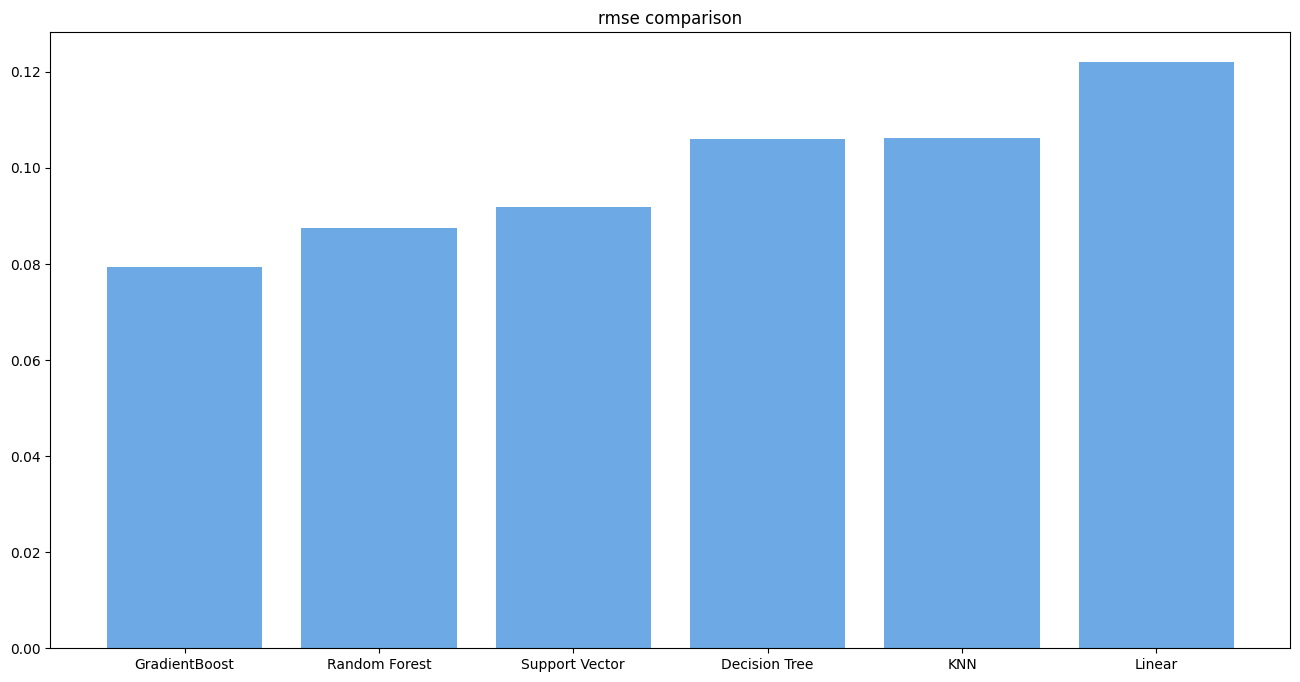

In [58]:
fig = plt.figure(figsize = (16, 8))
plt.bar(names,rmse,width=0.8,color='#6DA9E4')
plt.title('rmse comparison')

Text(0.5, 1.0, 'mae comparison')

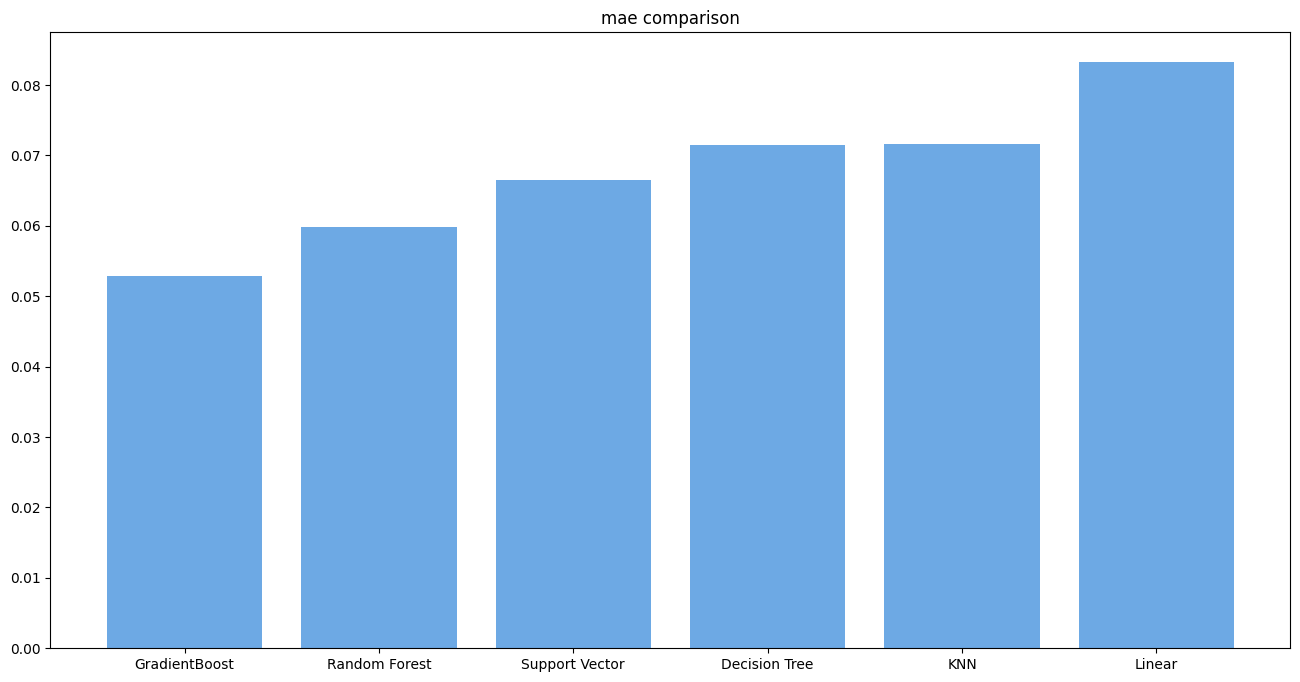

In [59]:
fig = plt.figure(figsize = (16, 8))
plt.bar(names,mae,width=0.8,color='#6DA9E4')
plt.title('mae comparison')

In [60]:
Final_models = results.iloc[:1,:]

In [61]:
Final_models

,Model Name,R2 Score,RMSE,MAE
0,GradientBoost,0.821409,0.079277,0.052834
